<a href="https://colab.research.google.com/github/qtuter1997/kmeanBasic/blob/AndyLe/kmeanBasic.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [90]:
!git clone https://github.com/conanak99/jav-py

fatal: destination path 'jav-py' already exists and is not an empty directory.


In [91]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn import metrics
import warnings
warnings.filterwarnings('ignore')

In [92]:
actress = pd.read_json('jav-py/acctress.json')
actress.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11186 entries, 0 to 11185
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   id           11186 non-null  int64  
 1   name         11186 non-null  object 
 2   japanName    11186 non-null  object 
 3   hiragana     11186 non-null  object 
 4   bust         6456 non-null   float64
 5   waist        6436 non-null   float64
 6   hip          6428 non-null   float64
 7   height       5012 non-null   float64
 8   birthday     4031 non-null   object 
 9   blood_type   3171 non-null   object 
 10  hobby        3730 non-null   object 
 11  prefectures  4471 non-null   object 
dtypes: float64(4), int64(1), object(7)
memory usage: 1.0+ MB


In [93]:
actress.head()

,id,name,japanName,hiragana,bust,waist,hip,height,birthday,blood_type,hobby,prefectures
0,3,Kitagawa Yui,北川ゆい,きたがわゆい,95.0,60.0,88.0,NaN,1980-12-14,AB,クラシックバレエ,None
1,4,Akira,Akira,あきら,90.0,58.0,86.0,157.0,1978-08-15,A,水泳、ゴルフ,東京都
2,6,Cocolo,COCOLO,こころ,96.0,55.0,85.0,168.0,1982-07-07,B,パソコン,茨城県
3,8,Saiko,Saiko,さいこ,80.0,59.0,82.0,162.0,1983-04-12,O,料理、大食い,東京都
4,11,Aida Momo,あいだもも,あいだもも,82.0,55.0,89.0,162.0,1970-06-18,A,エアロビクス,東京都


In [94]:
df = actress[['bust','waist','hip','height','blood_type']]
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11186 entries, 0 to 11185
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   bust        6456 non-null   float64
 1   waist       6436 non-null   float64
 2   hip         6428 non-null   float64
 3   height      5012 non-null   float64
 4   blood_type  3171 non-null   object 
dtypes: float64(4), object(1)
memory usage: 437.1+ KB


In [95]:
df = df.dropna()
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2678 entries, 1 to 11185
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   bust        2678 non-null   float64
 1   waist       2678 non-null   float64
 2   hip         2678 non-null   float64
 3   height      2678 non-null   float64
 4   blood_type  2678 non-null   object 
dtypes: float64(4), object(1)
memory usage: 125.5+ KB


In [96]:
df.head()

,bust,waist,hip,height,blood_type
1,90.0,58.0,86.0,157.0,A
2,96.0,55.0,85.0,168.0,B
3,80.0,59.0,82.0,162.0,O
4,82.0,55.0,89.0,162.0,A
6,85.0,60.0,88.0,165.0,A


In [97]:
df.blood_type.value_counts()

A     1100
O      939
B      422
AB     217
Name: blood_type, dtype: int64

In [98]:
mapper = {'O':0,'A':1,'B':2,'AB':3}
df['blood_type'] = df['blood_type'].map(mapper)
df.head()

,bust,waist,hip,height,blood_type
1,90.0,58.0,86.0,157.0,1
2,96.0,55.0,85.0,168.0,2
3,80.0,59.0,82.0,162.0,0
4,82.0,55.0,89.0,162.0,1
6,85.0,60.0,88.0,165.0,1


In [99]:
actress_np = df.to_numpy()
actress_np

array([[ 90.,  58.,  86., 157.,   1.],
       [ 96.,  55.,  85., 168.,   2.],
       [ 80.,  59.,  82., 162.,   0.],
       ...,
       [ 83.,  58.,  85., 165.,   0.],
       [ 88.,  58.,  87., 153.,   0.],
       [ 88.,  59.,  86., 161.,   2.]])

In [100]:
#Test k = 5
k_means_5 = KMeans(n_clusters = 5)
k_means_5.fit(actress_np)
labels_5 = k_means_5.labels_

In [101]:
labels_5

array([1, 3, 0, ..., 3, 1, 3], dtype=int32)

In [102]:
metrics.silhouette_score(actress_np,labels_5, metric='euclidean')

0.23703995427634916

In [103]:
metrics.calinski_harabasz_score(actress_np, labels_5)

1065.3489570759602

In [104]:
#Compute k use Elbow method
sum_distances = []
K = range(1,15)
for k in K:
    k_mean = KMeans(n_clusters = k)
    k_mean.fit(actress_np)
    sum_distances.append(k_mean.inertia_)

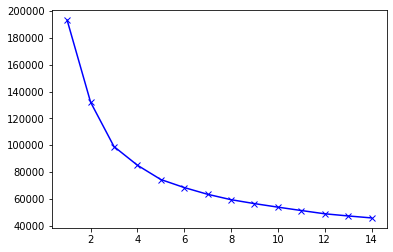

In [105]:
plt.plot(K,sum_distances, 'bx-')
plt.show()

In [106]:
##Compute k use Elbow method - Comprehention
# K = range(1,15)
# k_ms = [KMeans(n_clusters = i).fit(actress_np) for i in K]
# scores = [k_ms[i].score(actress_np) for i in range(len(k_ms))]
# print(k_ms[11].score(actress_np))
# plt.plot(K,scores,'bx-')

In [107]:
#Chose the best number of cluster based elbow
# scores = np.array(scores)
# dif_scores = scores/scores[0]
# dif_scores = np.diff(dif_scores)
# n_cls = np.argwhere(dif_scores < np.quantile(dif_scores,0.9))[-1][0]
# print(n_cls)

In [108]:
k_means_3 = KMeans(n_clusters = 3)
model = k_means_3.fit(actress_np)
result = k_means_3.labels_

In [109]:
result

array([1, 0, 2, ..., 2, 1, 2], dtype=int32)

In [110]:
metrics.silhouette_score(actress_np, result, metric='euclidean')

0.3044177022179745

In [111]:
metrics.calinski_harabasz_score(actress_np, result)

1271.3918500441293

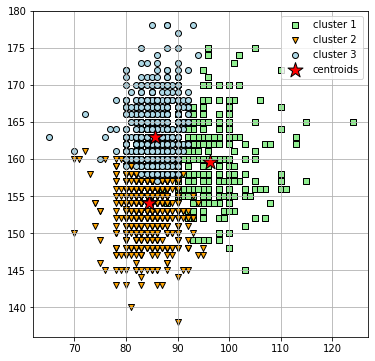

In [123]:
t = plt.figure(figsize=(6,6))
plt.scatter(
    actress_np[result == 0, 0], actress_np[result == 0, 3],
    c = 'lightgreen',
    marker = 's',
    edgecolors = 'black',
    label = 'cluster 1'
)
plt.scatter(
    actress_np[result == 1, 0], actress_np[result == 1, 3],
    c = 'orange',
    marker = 'v',
    edgecolors = 'black',
    label = 'cluster 2'
)
plt.scatter(
    actress_np[result == 2, 0], actress_np[result == 2, 3],
    c = 'lightblue',
    marker = 'o',
    edgecolors = 'black',
    label = 'cluster 3'
)
plt.scatter(
    model.cluster_centers_[:,0], model.cluster_centers_[:,3],
    c = 'red', s = 250,
    marker = '*',
    edgecolors = 'black',
    label = 'centroids'
)

plt.legend(scatterpoints = 1)
plt.grid()
plt.show()

In [125]:
df1 = actress[['id','bust','waist','hip','height','blood_type']]
df1 = df1.dropna()
df1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2678 entries, 1 to 11185
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   id          2678 non-null   int64  
 1   bust        2678 non-null   float64
 2   waist       2678 non-null   float64
 3   hip         2678 non-null   float64
 4   height      2678 non-null   float64
 5   blood_type  2678 non-null   object 
dtypes: float64(4), int64(1), object(1)
memory usage: 146.5+ KB


In [126]:
df2 = actress[['id','name','japanName']]
df2.head()

,id,name,japanName
0,3,Kitagawa Yui,北川ゆい
1,4,Akira,Akira
2,6,Cocolo,COCOLO
3,8,Saiko,Saiko
4,11,Aida Momo,あいだもも


In [127]:
lookup = df1.merge(df2, how = 'left', on = 'id')
lookup.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2678 entries, 0 to 2677
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   id          2678 non-null   int64  
 1   bust        2678 non-null   float64
 2   waist       2678 non-null   float64
 3   hip         2678 non-null   float64
 4   height      2678 non-null   float64
 5   blood_type  2678 non-null   object 
 6   name        2678 non-null   object 
 7   japanName   2678 non-null   object 
dtypes: float64(4), int64(1), object(3)
memory usage: 188.3+ KB


In [128]:
lookup['cluster'] = result
lookup.head()

,id,bust,waist,hip,height,blood_type,name,japanName,cluster
0,4,90.0,58.0,86.0,157.0,A,Akira,Akira,1
1,6,96.0,55.0,85.0,168.0,B,Cocolo,COCOLO,0
2,8,80.0,59.0,82.0,162.0,O,Saiko,Saiko,2
3,11,82.0,55.0,89.0,162.0,A,Aida Momo,あいだもも,2
4,17,85.0,60.0,88.0,165.0,A,Aduki Miyu,あづき美由,2


In [137]:
def recommend(model,bust, waist, hip, height, blood_type):
  arr = np.array([[bust, waist, hip, height, blood_type]])
  pred = model.predict(arr)
  return lookup[lookup['cluster'] == pred[0]].sample(10)

In [140]:
bust = 90
waist = 55
hip = 90
height = 157
blood_type = 1
recommend(model,bust, waist, hip, height, blood_type)

,id,bust,waist,hip,height,blood_type,name,japanName,cluster
2535,900,92.0,58.0,88.0,155.0,A,Takada Nori,高田のり,0
484,17188,99.0,58.0,87.0,155.0,A,Aoyama Nana,青山菜々,0
1266,2919,100.0,60.0,93.0,155.0,B,Yumeno Maria,夢野まりあ,0
1227,30654,100.0,62.0,88.0,157.0,O,Nakano Kyouko,中野恭子,0
1011,25748,91.0,60.0,88.0,162.0,B,Suma Anri,須真杏里（須真杏理）,0
1233,1000050,97.0,58.0,89.0,162.0,B,Morobosi Seira,諸星セイラ（百瀬涼）,0
419,16386,98.0,60.0,88.0,150.0,A,Watabe Zyun,渡部准,0
682,20337,108.0,68.0,96.0,154.0,AB,Kinuta Mitu,絹田美津,0
127,11714,103.0,60.0,92.0,155.0,A,Hayasi Maria,林マリア,0
351,15048,93.0,66.0,92.0,149.0,O,Hukuyama Youko,阿部菜津子（福山洋子、織原寧々）,0
